# Telecom Churn Case Prediction

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# Step1 - Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading dataset into dataframe named 'data'
data = pd.read_csv("telecom_churn_data.csv")

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.info('display_max_columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


# Step2 - Initial Data Cleaning

## 1) Dropping columns which are not required & identifying types of variables

In [6]:
## Dropping columns which are not useful in making predictions
columns_to_drop1 = ['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',]
data.drop(columns_to_drop1,axis=1,inplace=True)

In [7]:
## Also dropping the columns which have one single same entry across all the rows
columns_to_drop2 = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
data.drop(columns_to_drop2,axis=1,inplace=True)

In [8]:
data.shape

(99999, 209)

In [9]:
data.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [10]:
## Identifying the 'Categorical' and 'numerical' variables in our dataset
cat_var = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

## Apart from categorical variables, rest are the numerical variables
num_var = [column for column in data.columns if column not in cat_var]

print(len(cat_var))
print(len(num_var))

8
201


## 2) Handling Missing Values

In [11]:
## Looking at the percentage of null entries in every column
pd.set_option('display.max_rows',None)
percentage_of_null_entries = round(data.isnull().sum()/len(data.index),2)
percentage_of_null_entries

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           0.04
onnet_mou_7           0.04
onnet_mou_8           0.05
onnet_mou_9           0.08
offnet_mou_6          0.04
offnet_mou_7          0.04
offnet_mou_8          0.05
offnet_mou_9          0.08
roam_ic_mou_6         0.04
roam_ic_mou_7         0.04
roam_ic_mou_8         0.05
roam_ic_mou_9         0.08
roam_og_mou_6         0.04
roam_og_mou_7         0.04
roam_og_mou_8         0.05
roam_og_mou_9         0.08
loc_og_t2t_mou_6      0.04
loc_og_t2t_mou_7      0.04
loc_og_t2t_mou_8      0.05
loc_og_t2t_mou_9      0.08
loc_og_t2m_mou_6      0.04
loc_og_t2m_mou_7      0.04
loc_og_t2m_mou_8      0.05
loc_og_t2m_mou_9      0.08
loc_og_t2f_mou_6      0.04
loc_og_t2f_mou_7      0.04
loc_og_t2f_mou_8      0.05
loc_og_t2f_mou_9      0.08
loc_og_t2c_mou_6      0.04
loc_og_t2c_mou_7      0.04
loc_og_t2c_mou_8      0.05
loc_og_t2c_mou_9      0.08
loc_og_mou_6          0.04
l

In [12]:
## Replacing null values in Categorical Variables with a new category '-1'
data[cat_var] = data[cat_var].apply(lambda x : x.fillna(-1))

In [13]:
## Finding columns where '0' can be imputed in null values because 0 value satisfies the conditions 
zero_col_impute = list(data.loc[:,'total_rech_data_6':'av_rech_amt_data_9'].columns)
data[zero_col_impute] = data[zero_col_impute].apply(lambda x : x.fillna(0))

In [14]:
## Inputing rest of the columns with median values
non_zero_col_impute = [col for col in data.columns if col not in zero_col_impute + cat_var]

for i in non_zero_col_impute:
    data[i] = data[i].fillna(data[i].median())

In [15]:
## Looking at the percentage of null entries in every column again
pd.set_option('display.max_rows',None)
percentage_of_null_entries = round(data.isnull().sum()/len(data.index),2)
percentage_of_null_entries

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

### 3) Filtering high value customers

In [16]:
## selecting the "high value customers" based on the criterion given
data['total_rchg_data_amt_6_7'] = ((data['total_rech_amt_6'] + data['total_rech_data_6']*data['av_rech_amt_data_6']) + (data['total_rech_amt_7'] + data['total_rech_data_7']*data['av_rech_amt_data_7']))/2

In [17]:
data = data[data['total_rchg_data_amt_6_7']>np.quantile(data['total_rchg_data_amt_6_7'],0.7)]

In [18]:
data.shape

(29953, 210)

In [19]:
## Dropping the column we have created for defining high value customers
data.drop('total_rchg_data_amt_6_7',axis=1,inplace=True)

### 4) Tagging Churn 

In [20]:
## Defining a label "Churn" based on the criterion given
data['Churn'] = np.where((data['total_ic_mou_9']==0)&(data['total_og_mou_9']==0)&(data['vol_2g_mb_9']==0)&(data['vol_3g_mb_9']==0),1,0)

In [21]:
data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,Churn
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,...,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,...,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.630,...,-1.0,1.0,1.0,-1.0,315,21.03,910.65,122.16,0.00,0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.680,...,-1.0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0.00,0
23,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.360,...,-1.0,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0


### 5) Dropping columns of the last month (_9)

In [22]:
## Dropping all the columns with '_9' in their column name
columns_to_churn = data.columns[data.columns.str.contains('_9')]
data.drop(columns_to_churn,axis=1,inplace=True)

In [23]:
data.shape

(29953, 158)

### 6) Removing Outliers

In [24]:
pd.set_option('display.max_columns',500)
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,299

In [25]:
### We see that there are outliers in the continuous variables. 
### Removing the data entries having outliers as it may affect our model
numeric_col_for_outliers = [i for i in data.columns if i not in cat_var]
numeric_col_for_outliers.remove('Churn')

def outliers(x):
    list = []
    for col in numeric_col_for_outliers:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

final_data = outliers(data)

In [26]:
final_data.shape

(26748, 158)

In [27]:
## Finding % of churn case in our datase
print("Percentage of churn cases in our database is " + str((len(final_data[final_data['Churn']==1])/len(final_data.index))*100))

Percentage of churn cases in our database is 8.049199940182444


# Step3 - EDA

## 1) Univariate Analysis

### a) Number of Churn Cases

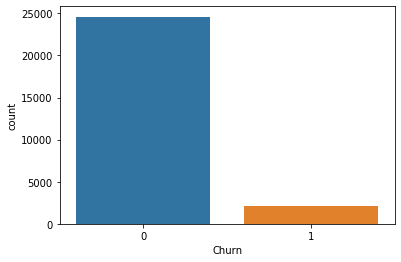

In [28]:
sns.countplot(x='Churn',data=final_data)

### b) Total Recharge Amount

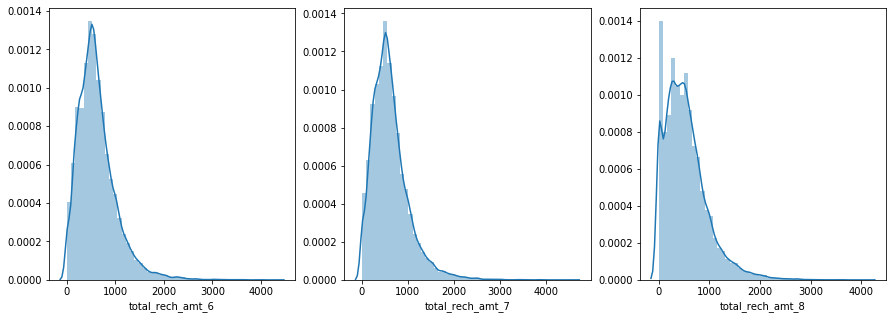

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(final_data['total_rech_amt_6'])
plt.subplot(1,3,2)
sns.distplot(final_data['total_rech_amt_7'])
plt.subplot(1,3,3)
sns.distplot(final_data['total_rech_amt_8'])

## 2) Bivariate Analysis

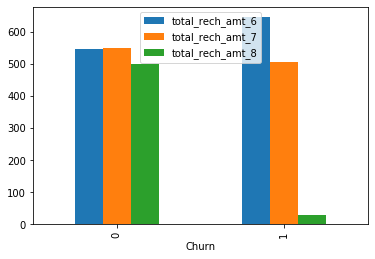

In [30]:
## Visualizing the trend in ' total_rech_amt' between different months for churn and non churn cases
grouping1 = final_data.groupby('Churn')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].median().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'total_rech_amt' in month 8 for churn cases

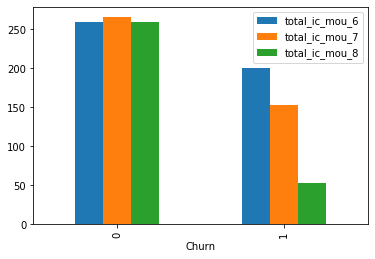

In [31]:
## Visualizing the trend in ' total_ic_mou' between different months for churn and non churn cases
grouping2 = final_data.groupby('Churn')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'total_ic_mou' in month 8 for churn cases

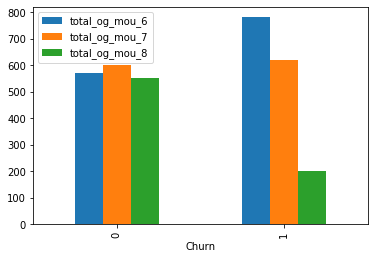

In [32]:
## Visualizing the trend in ' total_og_mou' between different months for churn and non churn cases
grouping3 = final_data.groupby('Churn')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'total_og_mou' in month 8 for churn cases

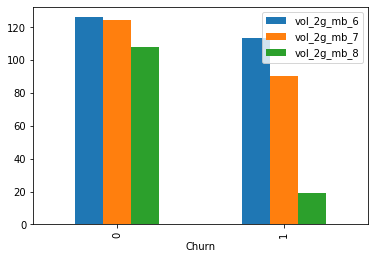

In [33]:
## Visualizing the trend in ' vol_2g_mb' between different months for churn and non churn cases
grouping4 = final_data.groupby('Churn')['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'vol_2g_mb' in month 8 for churn cases

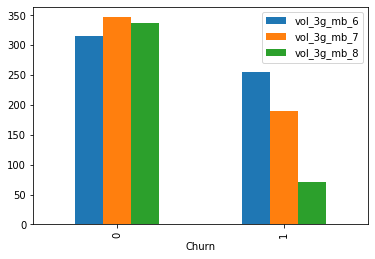

In [34]:
## Visualizing the trend in ' vol_3g_mb' between different months for churn and non churn cases
grouping5 = final_data.groupby('Churn')['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'vol_3g_mb' in month 8 for churn cases

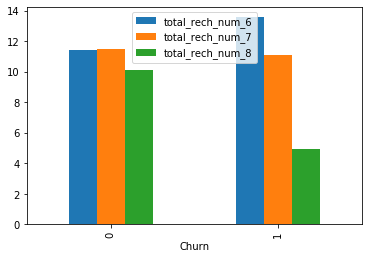

In [35]:
## Visualizing the trend in ' total_rech_num' between different months for churn and non churn cases
grouping6 = final_data.groupby('Churn')['total_rech_num_6','total_rech_num_7','total_rech_num_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'total_rech_num' in month 8 for churn cases

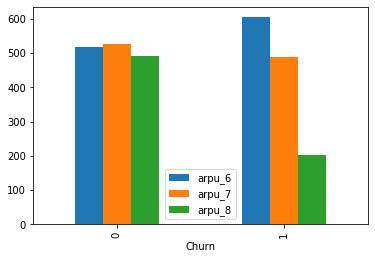

In [36]:
## Visualizing the trend in ' arpu' between different months for churn and non churn cases
grouping6 = final_data.groupby('Churn')['arpu_6','arpu_7','arpu_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'arpu' in month 8 for churn cases

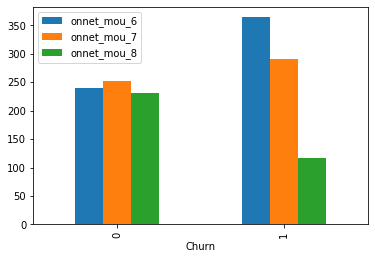

In [37]:
## Visualizing the trend in ' onnet_mou' between different months for churn and non churn cases
grouping7 = final_data.groupby('Churn')['onnet_mou_6','onnet_mou_7','onnet_mou_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'onnet_mou' in month 8 for churn cases

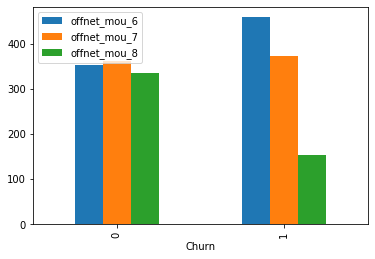

In [38]:
## Visualizing the trend in ' offnet_mou' between different months for churn and non churn cases
grouping8 = final_data.groupby('Churn')['offnet_mou_6','offnet_mou_7','offnet_mou_8'].mean().plot(kind='bar')

## Conclusion - We observe a sudden decrease in 'offnet_mou' in month 8 for churn cases

# Step4 - Derived Columns

As Per the Customer Behaviour, there are three phases :

#1) Good Phase - Months 6 & 7

#2) Action Phase - Month 8

#3) Churn Phase - Month 9

Since we have dropped the churn month (9) data, we will derive some new features based on the change in behaviours between 'Good'(6&7) and 'Action'(8) Phase

In [39]:
final_data['arpu_diff_6_7'] = final_data['arpu_7'] - final_data['arpu_6']
final_data['arpu_diff_7_8'] = final_data['arpu_8'] - final_data['arpu_7']

final_data['total_rech_amt_6_7'] = final_data['total_rech_amt_7'] - final_data['total_rech_amt_6']
final_data['total_rech_amt_7_8'] = final_data['total_rech_amt_8'] - final_data['total_rech_amt_7']

final_data['total_ic_mou_6_7'] = final_data['total_ic_mou_7'] - final_data['total_ic_mou_6']
final_data['total_ic_mou_7_8'] = final_data['total_ic_mou_8'] - final_data['total_ic_mou_7']

final_data['total_og_mou_6_7'] = final_data['total_og_mou_7'] - final_data['total_og_mou_6']
final_data['total_og_mou_7_8'] = final_data['total_og_mou_8'] - final_data['total_og_mou_7']

final_data['vol_2g_mb_6_7'] = final_data['vol_2g_mb_7'] - final_data['vol_2g_mb_6']
final_data['vol_2g_mb_7_8'] = final_data['vol_2g_mb_8'] - final_data['vol_2g_mb_7']

final_data['vol_3g_mb_6_7'] = final_data['vol_3g_mb_7'] - final_data['vol_3g_mb_6']
final_data['vol_3g_mb_7_8'] = final_data['vol_3g_mb_8'] - final_data['vol_3g_mb_7']

final_data['onnet_mou_6_7'] = final_data['onnet_mou_7'] - final_data['onnet_mou_6']
final_data['onnet_mou_7_8'] = final_data['onnet_mou_8'] - final_data['onnet_mou_7']

final_data['offnet_mou_6_7'] = final_data['offnet_mou_7'] - final_data['offnet_mou_6']
final_data['offnet_mou_7_8'] = final_data['offnet_mou_8'] - final_data['offnet_mou_7']

final_data['total_rech_num_6_7'] = final_data['total_rech_num_7'] - final_data['total_rech_num_6']
final_data['total_rech_num_7_8'] = final_data['total_rech_num_8'] - final_data['total_rech_num_7']

In [40]:
final_data.shape

(26748, 176)

# Step5 - Modelling

First building a model using PCA for accurate predictions

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

##  PCA and Random Forests

### 1) Feature Standardization

In [42]:
y = final_data['Churn']
X = final_data.drop('Churn',axis=1,inplace=False)

In [43]:
# Normalising continuous features
new_numeric_att = ['arpu_diff_6_7','arpu_diff_7_8','total_rech_amt_6_7','total_rech_amt_7_8','total_ic_mou_6_7','total_ic_mou_7_8','total_og_mou_6_7','total_og_mou_7_8','vol_2g_mb_6_7','vol_2g_mb_7_8','vol_3g_mb_6_7','vol_3g_mb_7_8','onnet_mou_6_7','onnet_mou_7_8','offnet_mou_6_7','offnet_mou_7_8','total_rech_num_6_7','total_rech_num_7_8']
total_numeric_att = numeric_col_for_outliers + new_numeric_att

In [45]:
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

scaler = StandardScaler()
# Applying the scaler() function to all numeric variables
X[total_numeric_att] = scaler.fit_transform((X[total_numeric_att]))
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff_6_7,arpu_diff_7_8,total_rech_amt_6_7,total_rech_amt_7_8,total_ic_mou_6_7,total_ic_mou_7_8,total_og_mou_6_7,total_og_mou_7_8,vol_2g_mb_6_7,vol_2g_mb_7_8,vol_3g_mb_6_7,vol_3g_mb_7_8,onnet_mou_6_7,onnet_mou_7_8,offnet_mou_6_7,offnet_mou_7_8,total_rech_num_6_7,total_rech_num_7_8
0,-0.980126,-0.931567,-0.722641,-0.521052,-0.524526,-0.554741,-0.591314,-0.593351,-0.751559,-0.243772,-0.212340,-0.219513,-0.260865,-0.239431,-0.242631,-0.384146,-0.391869,-0.468302,-0.510313,-0.529012,-0.687323,-0.368441,-0.378087,-0.370207,-0.305513,-0.31537,-0.305325,-0.542042,-0.560243,-0.740780,-0.431357,-0.436679,-0.393246,-0.445682,-0.444185,-0.415555,-0.202196,-0.206889,-0.203168,0.0,0.0,0.0,-0.576209,-0.579498,-0.535497,-0.109533,-0.118121,-0.121835,-0.440000,-0.482225,-0.466224,-0.347359,0.0,0.0,-0.926790,-0.925077,-0.836396,-0.409928,-0.421544,-0.573173,-0.461985,-0.468005,-0.738666,-0.378644,-0.382036,-0.373511,-0.486483,-0.496572,-0.826450,-0.351614,-0.360302,-0.337570,-0.388130,-0.392070,-0.421133,-0.247724,-0.256476,-0.255193,0.0,0.0,0.0,-0.423614,-0.429781,-0.494495,-0.928120,-0.948550,-0.882087,-0.421125,-0.20905,-0.253513,-0.212375,-0.235344,-0.229007,-0.228321,-0.234032,-0.230518,-0.865729,-0.951983,-0.883120,-0.643318,-0.897720,-0.673241,0.652289,0.612612,0.755263,1.367105,1.328413,1.433066,-0.242906,-0.284961,-0.211358,1.661362,1.646390,1.751810,-0.511951,-0.531065,-0.495781,0.757685,0.684592,0.798318,0.729889,0.660121,0.786433,-0.311922,-0.399485,-0.351524,-0.334201,-0.260004,-0.295265,1.041178,1.026114,1.107482,1.148075,1.141462,1.236748,0.825194,0.816834,0.887386,-0.405131,-0.410402,-0.382553,-0.438933,-0.459592,-0.432755,1.404523,1.339493,1.419079,-0.271135,-0.259047,-0.240375,0.941906,0.93099

### 2) Train Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### 3) PCA on the data

In [47]:
X_train.shape

(18723, 175)

In [48]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,arpu_diff_6_7,arpu_diff_7_8,total_rech_amt_6_7,total_rech_amt_7_8,total_ic_mou_6_7,total_ic_mou_7_8,total_og_mou_6_7,total_og_mou_7_8,vol_2g_mb_6_7,vol_2g_mb_7_8,vol_3g_mb_6_7,vol_3g_mb_7_8,onnet_mou_6_7,onnet_mou_7_8,offnet_mou_6_7,offnet_mou_7_8,total_rech_num_6_7,total_rech_num_7_8
24738,0.415622,0.987153,0.269530,-0.425410,-0.394999,-0.363869,2.391483,3.166730,1.367985,-0.243772,-0.21234,0.962178,-0.260865,-0.239431,1.320776,-0.387351,-0.299744,-0.406342,-0.652398,-0.451580,-0.652045,-0.368441,-0.378087,-0.370207,0.324040,2.996281,0.727554,-0.683128,-0.494736,-0.685217,-0.268580,-0.283595,-0.256710,3.188083,3.828982,1.770957,-0.202196,-0.206889,-0.203168,0.0,0.0,0.0,1.965559,2.404706,0.985957,-0.109533,-0.118121,-0.121835,1.626718,2.310691,1.760071,1.960858,0.0,0.0,1.476379,2.021725,0.591782,-0.524132,-0.348514,-0.483657,-0.713606,-0.570685,-0.721897,-0.405659,-0.410155,-0.411775,-0.800529,-0.624844,-0.784264,-0.351614,-0.025801,-0.283383,-0.168981,-0.195979,0.196210,-0.247724,-0.256476,-0.255193,0.0,0.0,0.0,-0.307113,-0.189988,0.003484,-0.829776,-0.639307,-0.720456,-0.421125,-0.20905,-0.253513,-0.212375,-0.235344,-0.229007,-0.228321,-0.234032,-0.230518,0.384985,0.850035,0.151241,0.413339,0.896248,0.176914,-0.351019,-0.284538,-0.148002,0.129083,-0.553862,-0.386020,-0.628798,-0.640986,-0.596886,-0.725942,-0.735539,-0.682552,-0.511951,-0.531065,-0.495781,-0.44515,-0.434281,-0.414186,-0.729349,-0.746171,-0.672874,-0.410933,-0.403873,-0.372737,-0.456817,-0.473913,-0.452160,-0.410908,-0.410057,-0.391022,-0.397164,-0.400424,-0.375343,-1.107581,-1.129249,-1.049755,-0.405131,-0.410402,-0.382553,-0.438933,-0.459592,-0.432755,-0.365307,-0.364853,-0.351163,-0.271135,-0.259047,-0.240375,-1.108396,-1.125677

In [49]:
X_test.shape

(8025, 175)

In [50]:
pca = PCA(random_state=42)

In [51]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca.components_

array([[-0.1005134 , -0.11352842, -0.08630754, ...,  0.03637075,
        -0.00149333,  0.01185564],
       [ 0.10937778,  0.12142142,  0.14190874, ...,  0.02093124,
         0.00095298,  0.0272729 ],
       [ 0.0636319 ,  0.12679988,  0.09838913, ..., -0.02691266,
         0.04892235, -0.01558531],
       ...,
       [-0.        , -0.0961196 ,  0.10260907, ...,  0.07536441,
         0.00235089,  0.00815462],
       [-0.        ,  0.00623541, -0.00665639, ...,  0.02627925,
         0.02919956,  0.02593189],
       [ 0.        , -0.09433754,  0.1007067 , ...,  0.11662774,
         0.11081756,  0.09911924]])

In [53]:
pca.explained_variance_ratio_

array([1.17384083e-01, 9.56891502e-02, 6.18146408e-02, 4.90493799e-02,
       3.92976056e-02, 3.46381627e-02, 3.34655393e-02, 2.69509133e-02,
       2.32613085e-02, 2.15872895e-02, 1.94959294e-02, 1.88222562e-02,
       1.71193570e-02, 1.67164981e-02, 1.57372069e-02, 1.49524541e-02,
       1.43222492e-02, 1.35520596e-02, 1.27366293e-02, 1.20852550e-02,
       1.17020100e-02, 1.05380073e-02, 1.02948891e-02, 1.00875602e-02,
       9.54651381e-03, 9.32121174e-03, 9.01277174e-03, 8.65619994e-03,
       8.47319018e-03, 8.28073227e-03, 7.82957738e-03, 7.70650683e-03,
       7.37757425e-03, 7.31203060e-03, 6.99226160e-03, 6.82571687e-03,
       6.66511750e-03, 6.46949002e-03, 6.41211884e-03, 6.17014371e-03,
       5.79596537e-03, 5.58786142e-03, 5.42559813e-03, 5.23026477e-03,
       5.08271264e-03, 4.90634331e-03, 4.85557074e-03, 4.74696016e-03,
       4.65328698e-03, 4.52990694e-03, 4.45328937e-03, 4.42316706e-03,
       4.38099568e-03, 4.25316374e-03, 3.94666484e-03, 3.79046459e-03,
      

In [54]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

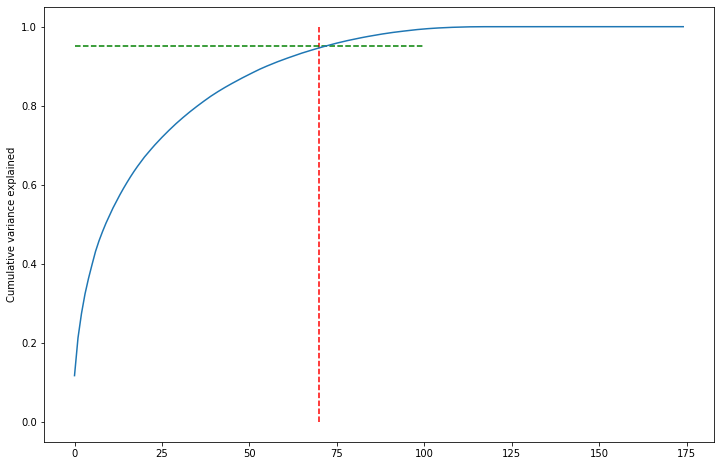

In [55]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### 4) Perform PCA with 75 components

In [56]:
pca_final = IncrementalPCA(n_components=70)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(18723, 70)

In [57]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(70, 70)

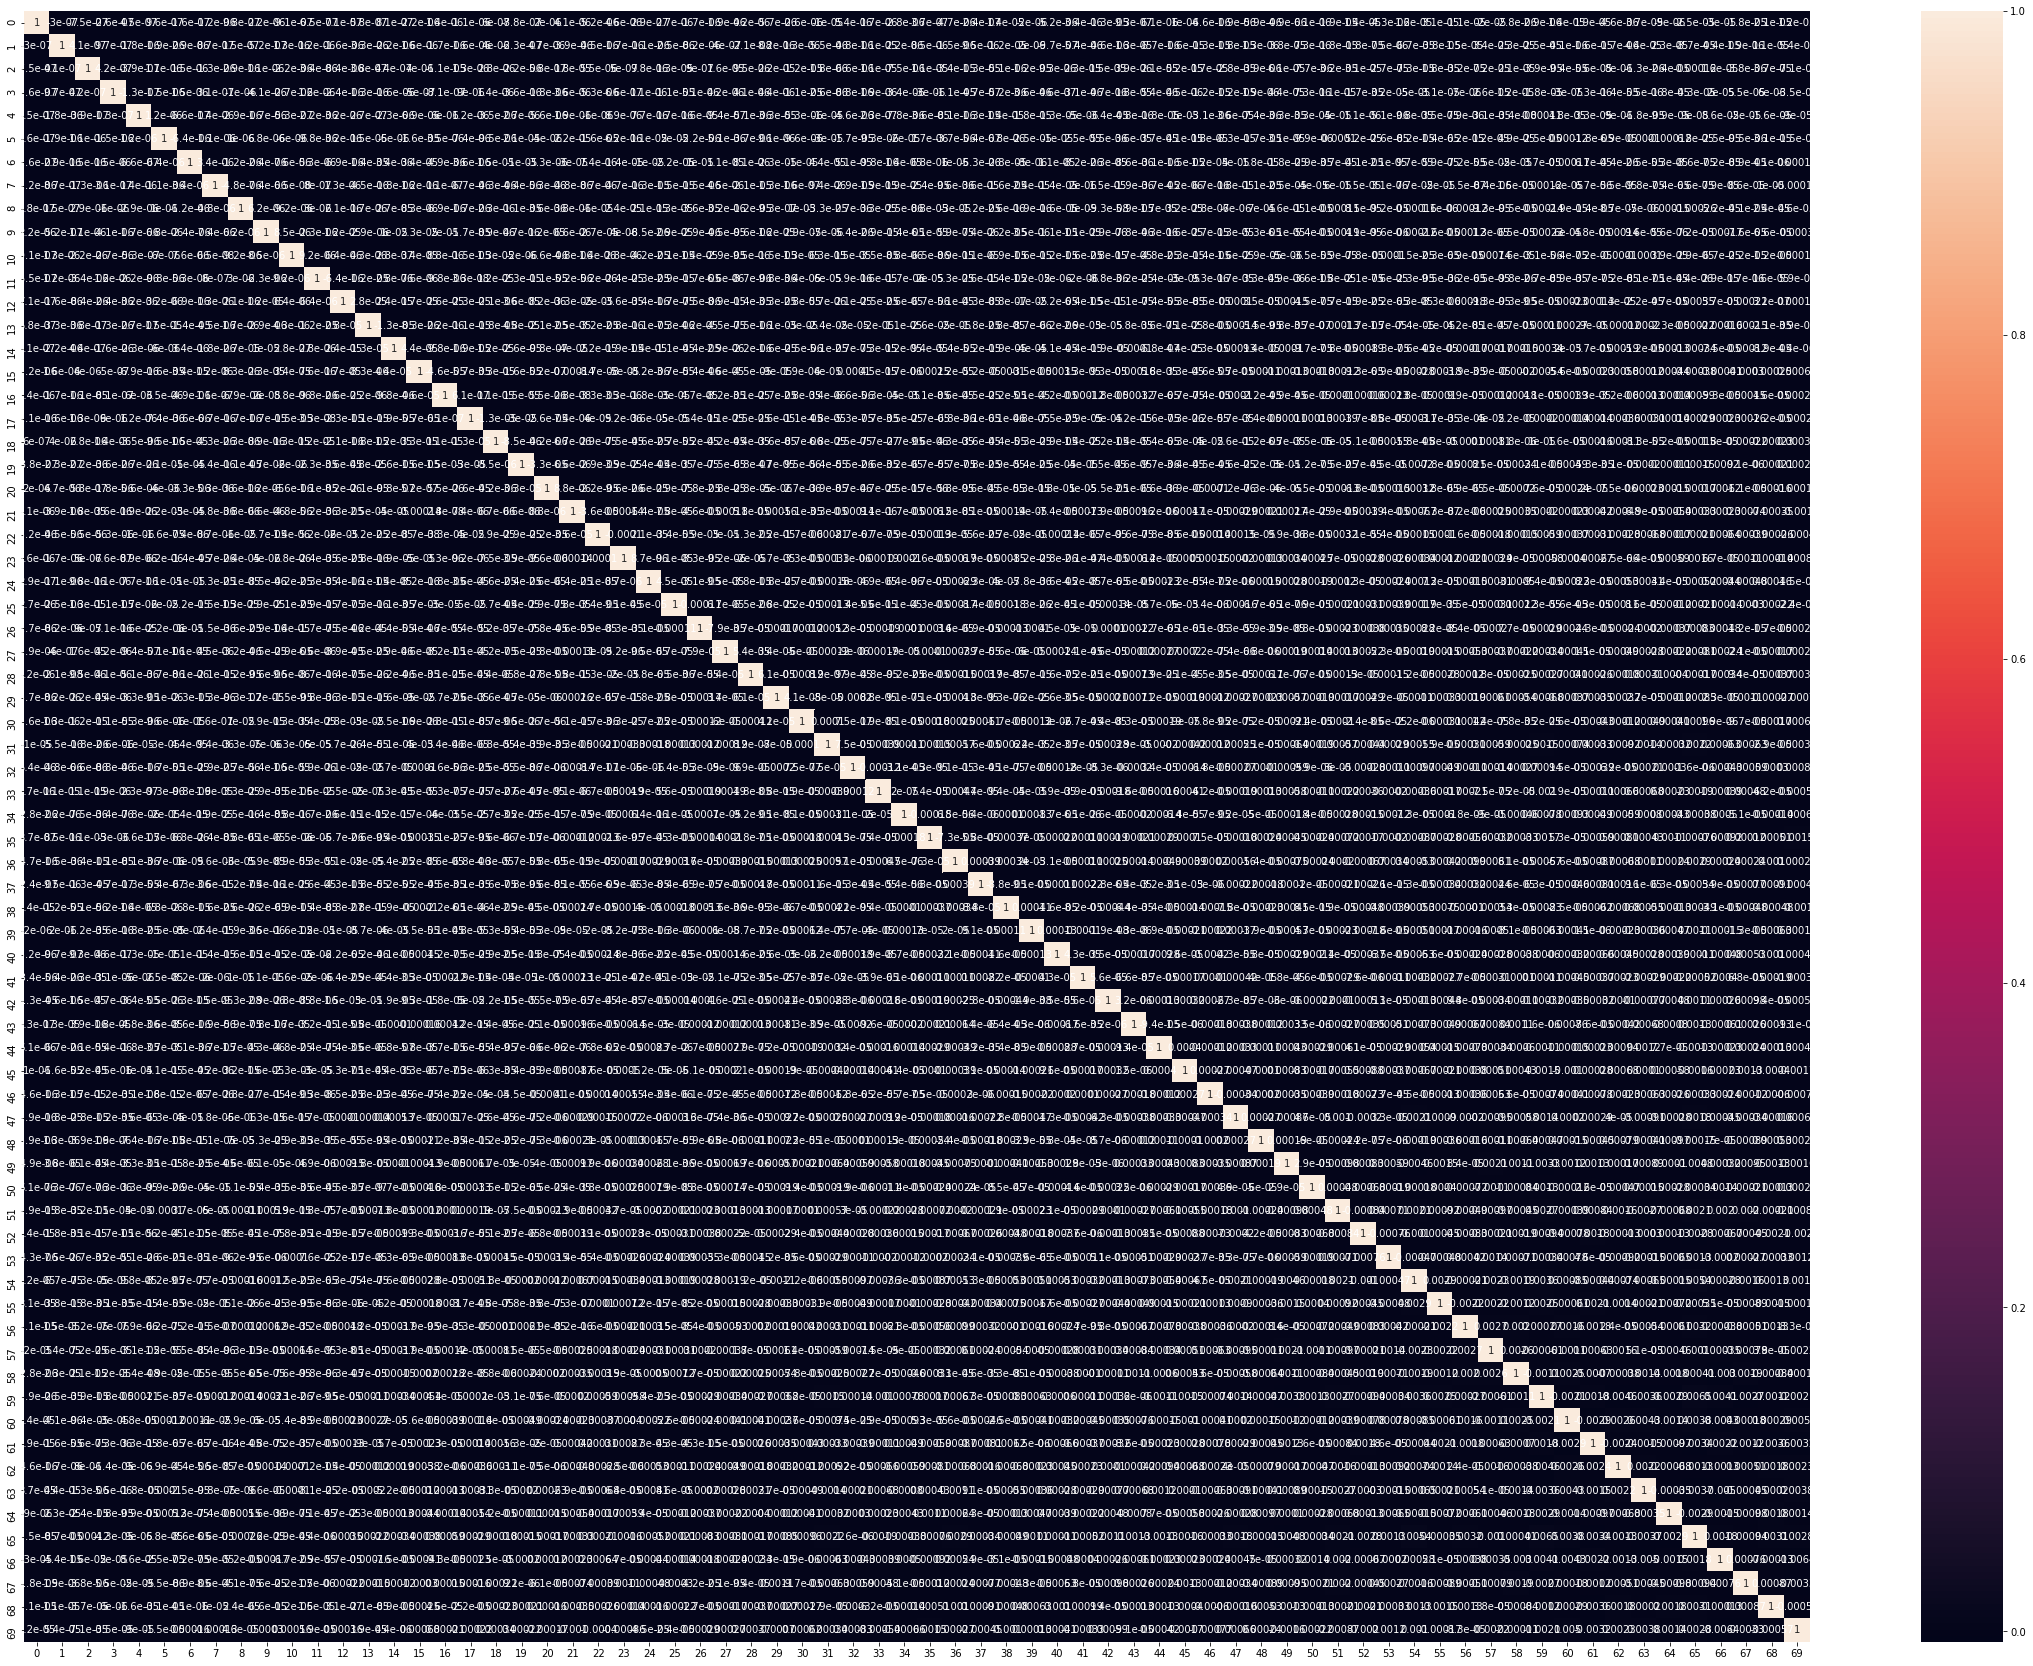

In [58]:
plt.figure(figsize=[40,30])
sns.heatmap(corrmat, annot=True)

In [59]:
##Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8025, 70)

### 5) Applying Random Forests on our data with Principal Components

Let's first fit a random forest model with default hyperparameters.

In [60]:
# Calculating class imbalance
y_train.value_counts()/y_train.shape

0    0.920739
1    0.079261
Name: Churn, dtype: float64

In [61]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

array([0.54304194, 6.30828841])

In [86]:
# Running the random forest with default parameters.
# the class weight is used to handle class imbalance - it adjusts the cost function
rfc = RandomForestClassifier(class_weight={0:0.001, 1:0.99}, n_jobs = -1)

# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.001, 1: 0.99}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [87]:
# Making predictions
predictions = rfc.predict(df_test_pca)
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7356
           1       0.54      0.14      0.23       669

    accuracy                           0.92      8025
   macro avg       0.73      0.57      0.59      8025
weighted avg       0.89      0.92      0.90      8025



In [88]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

[[7274   82]
 [ 572   97]]
0.9185046728971963


### Hyperparamter Tuning for Random Forests

#### 1) Tuning max_depth

In [115]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(70, 100, 10)}

# instantiate the model
rf1 = RandomForestClassifier(class_weight={0:0.001, 1:0.99}, n_jobs = -1)


# fit tree on training data
rf1 = GridSearchCV(rf1, parameters, 
                    cv=n_folds,return_train_score='warn', 
                   scoring="f1")
rf1.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.001, 1: 0.99},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                      

In [116]:
# scores of GridSearch CV
scores = rf1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.777063,0.615600,0.109380,0.000875,70,{'max_depth': 70},0.381969,0.382979,0.361364,0.385382,0.363636,0.375066,0.010345,3,0.621303,0.600963,0.615504,0.615863,0.566922,0.604111,0.019781
1,15.073141,0.323289,0.109158,0.001380,80,{'max_depth': 80},0.391813,0.406417,0.370678,0.398417,0.386667,0.390798,0.012041,2,0.723119,0.727328,0.713383,0.713942,0.704694,0.716493,0.007959
2,16.620962,2.124994,0.109184,0.001130,90,{'max_depth': 90},0.408304,0.410256,0.363636,0.386895,0.394231,0.392665,0.016926,1,0.810516,0.830242,0.823611,0.809264,0.791055,0.812937,0.013502


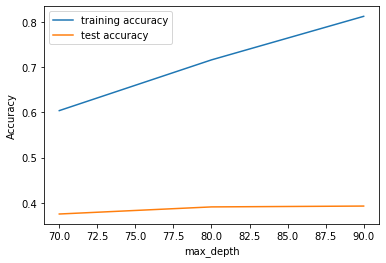

In [117]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Thus max_features = 80 could be the good value

#### 2) Tuning n_estimators

In [118]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model
rf1 = RandomForestClassifier(class_weight={0:0.001, 1:0.99}, n_jobs = -1)


# fit tree on training data
rf1 = GridSearchCV(rf1, parameters, 
                    cv=n_folds,return_train_score='warn', 
                   scoring="f1")
rf1.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.001, 1: 0.99},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                      

In [119]:
# scores of GridSearch CV
scores = rf1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.907957,1.142462,0.128986,0.043123,100,{'n_estimators': 100},0.213483,0.238961,0.203297,0.213333,0.202186,0.214252,0.013248,4,1.0,0.998312,1.0,0.999158,0.998312,0.999156,0.000755
1,80.725073,1.859283,0.370925,0.050817,500,{'n_estimators': 500},0.196629,0.264249,0.211957,0.221636,0.210526,0.220999,0.023049,1,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
2,142.844029,2.824725,0.654747,0.049651,900,{'n_estimators': 900},0.181818,0.252632,0.207084,0.230366,0.211111,0.216602,0.023741,3,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
3,206.593641,3.714758,0.934905,0.044551,1300,{'n_estimators': 1300},0.196629,0.253968,0.205405,0.224543,0.221607,0.220431,0.019674,2,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000


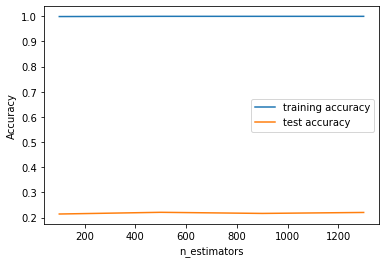

In [120]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 3)Tuning max_features

In [127]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf3 = RandomForestClassifier(class_weight={0:0.001, 1:0.99}, n_jobs = -1, max_depth = 80)


# fit tree on training data
rf3 = GridSearchCV(rf3, parameters, 
                    cv=n_folds,return_train_score='warn', 
                   scoring="f1")
rf3.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.001, 1: 0.99},
                                              criterion='gini', max_depth=80,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                        

In [128]:
# scores of GridSearch CV
scores = rf3.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.920810,0.545472,0.152656,0.051036,4,{'max_features': 4},0.395498,0.410405,0.341232,0.382398,0.368839,0.379674,0.023653,5,0.779383,0.785053,0.800675,0.793587,0.773899,0.786519,0.009620
1,15.218218,0.162658,0.108945,0.001121,8,{'max_features': 8},0.400000,0.408912,0.373780,0.393659,0.395408,0.394352,0.011565,3,0.715320,0.719830,0.733684,0.711803,0.687337,0.713595,0.015087
2,25.068062,0.411860,0.109719,0.001201,14,{'max_features': 14},0.418605,0.396985,0.373711,0.393316,0.382353,0.392994,0.015212,4,0.688315,0.693162,0.693162,0.697183,0.667792,0.687923,0.010450
3,35.380376,0.606778,0.108823,0.001423,20,{'max_features': 20},0.410738,0.419236,0.373880,0.396985,0.383626,0.396893,0.016712,1,0.675783,0.677898,0.677898,0.687717,0.640908,0.672041,0.016110
4,41.935650,1.104932,0.108178,0.001495,24,{'max_features': 24},0.414073,0.405797,0.375635,0.399002,0.388759,0.396653,0.013392,2,0.681022,0.678878,0.669300,0.678469,0.641102,0.669754,0.014882


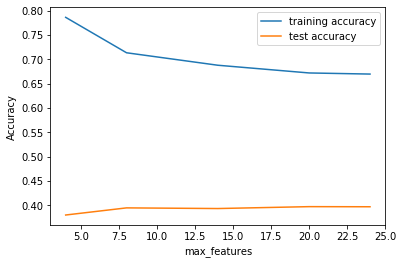

In [129]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [130]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(70,80,5),
    'min_samples_leaf': range(30,120, 30),
    'min_samples_split': range(40, 80, 20),
    'n_estimators': range(50,150, 20), 
    'max_features': range(6,10,2)
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.07, 1: 0.93}, n_jobs = -1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [131]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 12.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.07, 1: 0.93},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n...s=-1,
                                              oob_score=False,
                                        

In [132]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.898413715750681 using {'max_depth': 75, 'max_features': 6, 'min_samples_leaf': 30, 'min_samples_split': 60, 'n_estimators': 110}


In [133]:
# model with the best hyperparameters
rfc1 = RandomForestClassifier(class_weight={0:0.07, 1: 0.93}, n_jobs = -1,bootstrap=True,
                             max_depth=75,
                             min_samples_leaf=30, 
                             min_samples_split=60,
                             max_features=6,
                             n_estimators=110)

In [134]:
rfc1.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.07, 1: 0.93}, criterion='gini',
                       max_depth=75, max_features=6, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=60, min_weight_fraction_leaf=0.0,
                       n_estimators=110, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [135]:
predictions1 = rfc1.predict(df_test_pca)
# Let's check the report of our default model
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7356
           1       0.41      0.68      0.51       669

    accuracy                           0.89      8025
   macro avg       0.69      0.79      0.73      8025
weighted avg       0.92      0.89      0.90      8025



In [136]:
print(confusion_matrix(y_test,predictions1))

[[6708  648]
 [ 217  452]]


**This is our Final Model for Prediction with 89% Accuracy and 68% Recall**

## 2) Applying Logistic Regression based on features from Random Features for Model Interpretability

Let's first fit a random forest model with default hyperparameters.

In [142]:
# Running the random forest with default parameters.
# the class weight is used to handle class imbalance - it adjusts the cost function
rfc = RandomForestClassifier(class_weight={0:0.001, 1:0.99}, n_jobs = -1)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.001, 1: 0.99}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [144]:
# Making predictions
predictions = rfc.predict(X_test)
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7356
           1       0.75      0.40      0.53       669

    accuracy                           0.94      8025
   macro avg       0.85      0.70      0.75      8025
weighted avg       0.93      0.94      0.93      8025



In [145]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

[[7267   89]
 [ 399  270]]
0.939190031152648


### Hyperparameter Tuning

In [146]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(70,80,5),
    'min_samples_leaf': range(30,120, 30),
    'min_samples_split': range(40, 80, 20),
    'n_estimators': range(50,150, 20), 
    'max_features': range(6,10,2)
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.07, 1: 0.93}, n_jobs = -1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [147]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  8.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.07, 1: 0.93},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n...s=-1,
                                              oob_score=False,
                                        

In [148]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9159322758105004 using {'max_depth': 70, 'max_features': 8, 'min_samples_leaf': 30, 'min_samples_split': 60, 'n_estimators': 130}


In [149]:
# model with the best hyperparameters
rfc1 = RandomForestClassifier(class_weight={0:0.07, 1: 0.93}, n_jobs = -1,bootstrap=True,oob_score=True,
                             max_depth=70,
                             min_samples_leaf=30, 
                             min_samples_split=60,
                             max_features=8,
                             n_estimators=130)

In [150]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.07, 1: 0.93}, criterion='gini',
                       max_depth=70, max_features=8, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=60, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [152]:
# OOB score
rfc1.oob_score_

0.912887891897666

In [153]:
predictions1 = rfc1.predict(X_test)
# Let's check the report of our default model
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7356
           1       0.48      0.73      0.58       669

    accuracy                           0.91      8025
   macro avg       0.73      0.83      0.77      8025
weighted avg       0.93      0.91      0.92      8025



In [154]:
print(confusion_matrix(y_test,predictions1))

[[6828  528]
 [ 178  491]]


In [155]:
importances = rfc1.feature_importances_
importances

array([2.99375787e-03, 3.94866556e-03, 2.71972552e-02, 3.12993535e-03,
       4.03252758e-03, 5.37493905e-03, 2.47727606e-03, 3.05241257e-03,
       1.01778525e-02, 5.32079318e-04, 2.80572592e-03, 1.85720075e-02,
       6.67250857e-04, 1.18219559e-03, 2.13426437e-02, 2.28997390e-03,
       2.29583979e-03, 2.27693697e-02, 2.86636897e-03, 3.59939503e-03,
       2.96978808e-02, 1.26737734e-03, 2.36393119e-03, 1.13764649e-02,
       3.61113336e-04, 4.24079097e-04, 5.01707628e-04, 2.48645585e-03,
       2.65615507e-03, 2.70571046e-02, 1.96102126e-03, 2.05017535e-03,
       3.63866885e-03, 2.73582541e-03, 3.03495860e-03, 9.46562462e-03,
       4.45949405e-04, 2.06168243e-04, 3.33279581e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.53253573e-03, 4.13090064e-03,
       5.34375651e-03, 2.78568961e-04, 3.86550297e-04, 1.80279026e-04,
       1.16116815e-03, 1.54593720e-03, 4.03017366e-03, 2.10208180e-04,
       0.00000000e+00, 0.00000000e+00, 3.56835752e-03, 3.42667157e-03,
      

Feature ranking:
1. feature 86 (0.068636)
2. feature 107 (0.043741)
3. feature 56 (0.043670)
4. feature 68 (0.042656)
5. feature 62 (0.034255)
6. feature 101 (0.033288)
7. feature 20 (0.029698)
8. feature 164 (0.027246)
9. feature 2 (0.027197)
10. feature 29 (0.027057)
11. feature 104 (0.024246)
12. feature 17 (0.022769)
13. feature 158 (0.022587)
14. feature 162 (0.022063)
15. feature 160 (0.021537)
16. feature 14 (0.021343)
17. feature 122 (0.020678)
18. feature 11 (0.018572)
19. feature 59 (0.017129)
20. feature 113 (0.016688)
21. feature 65 (0.015685)
22. feature 152 (0.013118)
23. feature 110 (0.012732)
24. feature 172 (0.011883)
25. feature 137 (0.011857)
26. feature 125 (0.011829)
27. feature 23 (0.011376)
28. feature 8 (0.010178)
29. feature 98 (0.009942)
30. feature 174 (0.009761)
31. feature 35 (0.009466)
32. feature 83 (0.008545)
33. feature 128 (0.008246)
34. feature 74 (0.007996)
35. feature 170 (0.007694)
36. feature 166 (0.007537)
37. feature 116 (0.006132)
38. feature 1

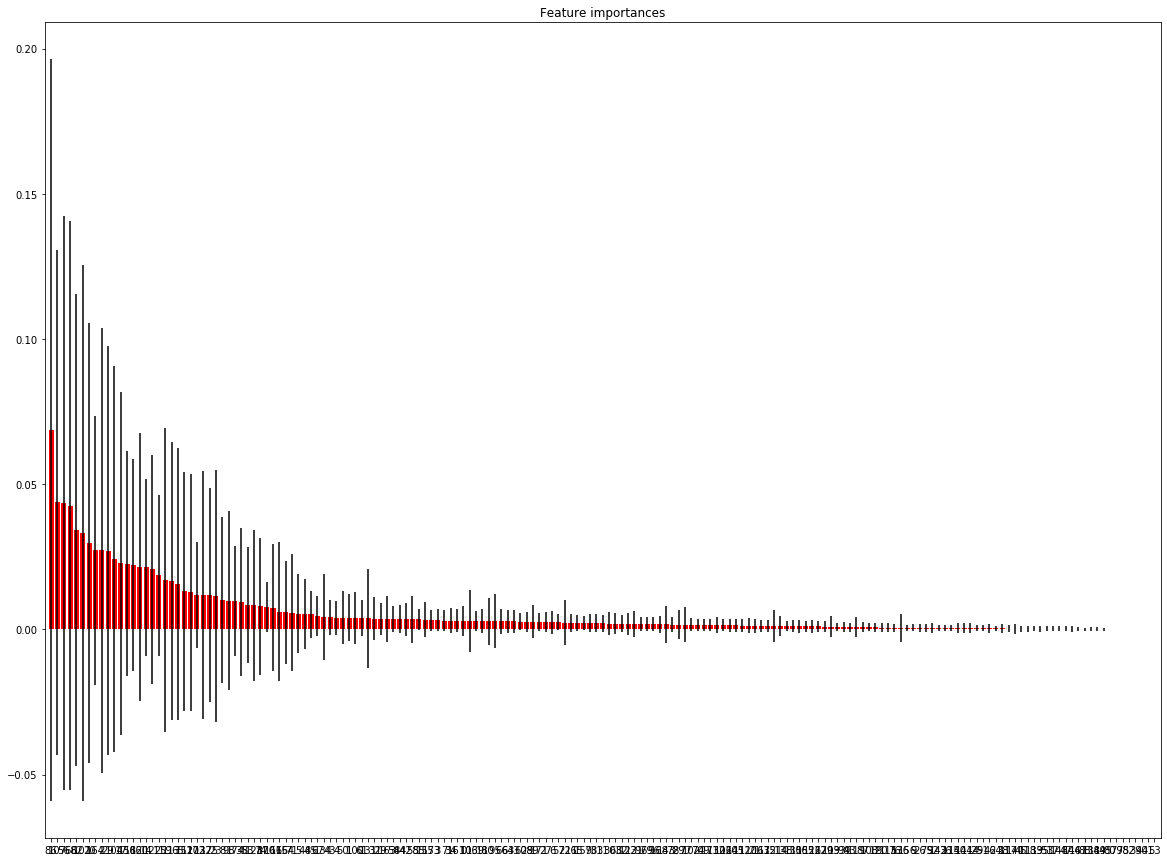

In [168]:
std = np.std([tree.feature_importances_ for tree in rfc1.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f +1 , indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,15))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [169]:
count = 0
for name, importance in zip(final_data.columns, rfc1.feature_importances_):
    count = count + 1
    print(count,name, "=", importance)

1 arpu_6 = 0.0029937578673330236
2 arpu_7 = 0.0039486655560782855
3 arpu_8 = 0.027197255234295666
4 onnet_mou_6 = 0.003129935347668055
5 onnet_mou_7 = 0.004032527576482202
6 onnet_mou_8 = 0.005374939054187952
7 offnet_mou_6 = 0.002477276060215169
8 offnet_mou_7 = 0.003052412571052922
9 offnet_mou_8 = 0.010177852549397499
10 roam_ic_mou_6 = 0.0005320793184300436
11 roam_ic_mou_7 = 0.002805725919654181
12 roam_ic_mou_8 = 0.018572007469605117
13 roam_og_mou_6 = 0.0006672508568616926
14 roam_og_mou_7 = 0.0011821955931364777
15 roam_og_mou_8 = 0.021342643689119596
16 loc_og_t2t_mou_6 = 0.002289973897334878
17 loc_og_t2t_mou_7 = 0.0022958397946494756
18 loc_og_t2t_mou_8 = 0.022769369664458444
19 loc_og_t2m_mou_6 = 0.002866368971642586
20 loc_og_t2m_mou_7 = 0.0035993950278381936
21 loc_og_t2m_mou_8 = 0.02969788078998744
22 loc_og_t2f_mou_6 = 0.0012673773404437674
23 loc_og_t2f_mou_7 = 0.002363931185011204
24 loc_og_t2f_mou_8 = 0.01137646494150377
25 loc_og_t2c_mou_6 = 0.0003611133361252659
26

In [171]:
# predictors
features = final_data.drop('Churn', axis=1).columns

# feature_importance
importance = rfc1.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,6.863552
1,last_day_rch_amt_8,4.374065
2,total_og_mou_8,4.367039
3,loc_ic_mou_8,4.265617
4,loc_ic_t2m_mou_8,3.425485
5,total_rech_amt_8,3.328752
6,loc_og_t2m_mou_8,2.969788
7,total_og_mou_7_8,2.724554
8,arpu_8,2.719726
9,loc_og_mou_8,2.705710


In [172]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

In [173]:
X_train_LR = X_train[top_features]
X_test_LR = X_test[top_features]

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [186]:
logsk = LogisticRegression(C=10,class_weight={0:0.07, 1: 0.93},penalty='l2')

In [187]:
logsk.fit(X_train_LR, y_train)

LogisticRegression(C=10, class_weight={0: 0.07, 1: 0.93}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_LR)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.133735
1,0.481423
2,0.263829
3,0.832920
4,0.004663


In [189]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
87096,0
43929,0
50169,0
94265,1
52375,0


In [192]:
# Putting CustID to index
y_test_df['Unique_ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Unique_ID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Unique_ID,Churn,Churn_Prob
0,0,0,0.133735
1,1,0,0.481423
2,2,0,0.263829
3,3,1,0.832920
4,4,0,0.004663


In [193]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Unique_ID,Churn,Churn_Prob,predicted
0,0,0,0.133735,0
1,1,0,0.481423,0
2,2,0,0.263829,0
3,3,1,0.832920,1
4,4,0,0.004663,0


In [194]:
from sklearn import metrics

In [195]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[5934, 1422],
       [ 121,  548]], dtype=int64)

In [196]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.8077258566978193

### Important predictor attributes

In [199]:
model_parameters = list(logsk.coef_)
model_parameters=np.around(model_parameters, decimals=2)
intercept=np.around(logsk.intercept_, decimals=2)
model_parameters=np.insert(model_parameters,0,intercept[0])
cols = X_train_LR.columns
cols = cols.insert(0, "constant")
Final_list=list(zip(cols, model_parameters))
LR_Coefficients=pd.DataFrame(Final_list,columns=['Feature','Coefficients'])
LR_Coefficients=LR_Coefficients.loc[LR_Coefficients.Coefficients!=0,:]

In [200]:
# Coefficients of optimum Model based on Logistic Regression
LR_Coefficients.sort_values(by='Coefficients',ascending=False).head(30)

,Feature,Coefficients
4,loc_ic_mou_8,12.01
10,loc_og_mou_8,5.53
9,arpu_8,0.94
25,night_pck_user_8,0.36
15,total_rech_amt_7_8,0.17
20,max_rech_data_8,0.16
16,roam_og_mou_8,0.09
11,max_rech_amt_8,0.08
28,offnet_mou_8,0.05
18,roam_ic_mou_8,0.04


## Conclusion :

1) A higher value of incoming minutes for local calls in the action phase is a good indication that a customer might chrun.

2) Decrease in the recharge amount from the good phase to action phase indicates a higher probability that the customer is going to churn. Company should give attractive and benefitted packages to customer in this action phase to have a chance of retention.

3) Decrease in the trend of local incoming and outgoing on the same operator network indicates a probability of churning. Company must notice this trend and give suitable calls packages to retain cusotmer

4) If the company notice a decrease in the average revenue from good phase to action phase, there is a probability of customer churn.